In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# world cloud lib
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


In [2]:
timesData= pd.read_csv("../input/world-university-rankings/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


## Line Chart

In [4]:
df=timesData.iloc[:100,:]
import plotly.graph_objs as go
trace1=go.Scatter(
                    x= df.world_rank,
                    y= df.citations,   
                    mode = "lines",
                    name = "citations",
                    marker=dict(color='rgba(16,112,2,0.8)'),  # hover text, grafikte bir noktaya gelince çıkan yazı arkaplanı
                    text= df.university_name )
# 1. grafik çizgisi alacağı değerler ve içeriği

trace2= go.Scatter(
                    x= df.world_rank,
                    y= df.teaching,
                    mode= "lines+markers",
                    name="teaching",
                    marker= dict(color='rgba(80,26,80,0.8)'),    #rgb and opacity- alpha  
                    text= df.university_name)
# 2. grafik çizgisi alacağı değerler ve içeriği

data=[trace1, trace2]  
# data bu iki grafik çizgisinden oluşsun

layout=dict(title='Citation and Teaching vs World Rank of Top 10 Universities',
            xaxis= dict(title="World Rank", ticklen=5, zeroline=False))
            # yaxis'te citation ve teaching birlikte bulunmaktadır mor çizginin oranı teaching değerini yeşil çizginin oranı ise citations değerini aynı üniversite için vermektedir.
fig= dict(data=data, layout=layout)  # figürü oluşturup
iplot(fig) # plot ettirdik

Buradan yapabileceğimiz çıkarım şudur, üniversite sıralaması azaldıkça öğretim kalitesi azalırken, ünniversite yayınlarından alıntılama sayısı sıralamaya göre düşmüyor. 

## Scatter 

In [5]:
# prepare data frames
df2014 = timesData[timesData.year==2014].iloc[:100,:]
df2015= timesData[timesData.year== 2015].iloc[:100,:]
df2016 = timesData[timesData.year== 2016].iloc[:100,:]

# import graph objects as go
import plotly.graph_objs as go

trace1= go.Scatter(
                x=df2014.world_rank,
                y= df2014.citations,
                mode="markers",
                name="2014",
                marker= dict(color='rgba(255,128,255,0.8)'),
                text= df2014.university_name)

trace2= go.Scatter(
                x=df2015.world_rank,
                y=df2015.citations,
                mode="markers",
                name="2015",
                marker= dict(color='rgba(255,128,2,0.8)'),
                text=df2015.university_name)

trace3=go.Scatter(
                x= df2016.world_rank,
                y= df2016.citations,
                mode="markers",
                name="2016",
                marker= dict(color='rgba(0,255,200,0.8)'),
                text=df2016.university_name)
data=[trace1, trace2, trace3]
layout= dict(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
             xaxis=dict(title='World Rank', ticklen=5, zeroline=False),
             yaxis=dict(title='Citation', ticklen=5, zeroline=False))
fig= dict(data=data, layout=layout)
iplot(fig)

Üniversitlerin 2014-2015-2016 yıllarında aldıkları sıralamayı göstermektedir.
<br> Aynı hizadaki farklı renkte üç nokta bir yılı ve o yıl sıralamada olan bir üniversiteyi temsil etmektedir.

## Bar Charts

In [6]:
df2014=timesData[timesData.year==2014].iloc[:3, :]   #2014 yılındaki ilk3 satırı al df2014 olarak ata
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [7]:
import plotly.graph_objs as go

trace1=go.Bar(
    x=df2014.university_name,
    y=df2014.citations,
    name="citations",
    marker= dict(color='rgba(255,174,255,0.5)', line=dict(color='rgb(0,0,0)',width=1.5)),
    text=df2014.country)

trace2=go.Bar(
    x=df2014.university_name,
    y=df2014.teaching,
    name="teaching",
    marker= dict(color='rgba(255,255,128,0.5)', line= dict(color='rgb(0,0,0)',width=1.5)),
    text=df2014.country)

data=[trace1, trace2]
layout= go.Layout(barmode="group")   # barları grupla anlamına gelmektedir.
fig= go.Figure(data=data, layout=layout)
iplot(fig)

In [8]:
df2014=timesData[timesData.year==2014].iloc[:3,:]
import plotly.graph_objs as go

x= df2014.university_name

trace1={
    'x':x,
    'y':df2014.citations,
    'name':'citation',
    'type':'bar'
};
trace2={
    'x':x,
    'y':df2014.teaching,
    'name': 'teaching',
    'type':'bar'
};
data=[trace1, trace2];
layout={
    'xaxis':{'title':'Top 3 universities'},
    'barmode': 'relative',   # relative olması bu barları altlı üstlü şekilde koyması anlamına geliyor    
    'title': 'citations and teaching of top 3 universities in 2014'
};
fig=go.Figure(data=data, layout= layout)
iplot(fig)

## Pie Chart

In [9]:
df2016.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016


In [10]:
df2016= timesData[timesData.year==2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list=[float(each.replace(',', '.')) for each in df2016.num_students] #float sayılar nokta ile yazıldığından dolayı num_students değerlerindeki virgül, noktaya çevrilmeli ve daha sonra bu sayılar veride string olduğundan dolayı floata'a çevriliyor.
labels=df2016.university_name

fig={
    "data":[      # trace bu şekilde de oluşturulabiliyor.
        {
            "values": pie1_list,
            "labels": labels,
            "domain": {"x": [0, .5]},
            "name": "Number Of Students Rates",
            "hoverinfo": "label+percent+name",
            "hole": .3,
            "type":"pie"
        },
    ],     # trace'den sonra layout yarattık.
    "layout":{
        "title": "Universities Number of Students rates",
        "annotations":[
            {
                "font":{"size":20},
                "showarrow": False,
                "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

Pie plot'a sayı vermemiz yeterli oluyor oranlama hesabını kendisi yapıyor.

## Bubble Charts


In [11]:
df2016.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016


In [12]:
df2016= timesData[timesData.year==2016].iloc[:20,:]
num_students_size=[float(each.replace(',','.')) for each in df2016.num_students]
international_color=[float(each) for each in df2016.international]

data=[     # data yaratıp içerisine trace koyduk
    {
        
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode':'markers',
        'marker':{    
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text": df2016.university_name
    }
]
iplot(data)

# bubble plotta color ve size'ı anlamlı hâle getiririz.
# layout yaratmadığım için fig oluşturmamıza gerek yok.

* Sarı olanlar international skoru en yüksek olanlardır.
* x ekseni world rank, y ekseni teaching, renkler international, size'lar ise num_student_size değerlerini vermektedir.
* buna göre 4 boyutlu bir grafik elde etmiş olduk.

## Histogram

In [13]:
x2011= timesData.student_staff_ratio[timesData.year==2011]
x2012= timesData.student_staff_ratio[timesData.year==2012]

trace1= go.Histogram(
    x= x2011, 
    opacity=0.75,
    name="2011",
    marker=dict(color='rgba(171,50,96,0.6)'))

trace2 = go.Histogram(
    x=x2012, 
    opacity=0.75,
    name="2012",
    marker=dict(color='rgba(12,50,196,0.6)'))

data=[trace1, trace2]
layout = go.Layout(barmode='overlay',
                  title='students-staff ratio in 2011 and 2012',
                  xaxis= dict(title='students-staff ratio'),
                  yaxis= dict(title='Count'),)
fig= go.Figure(data=data, layout=layout)
iplot(fig)

## Word Cloud
Bir pyplot değil ama görselleştirmede kullanıldığı için öğrenilmesi iyi olacaktır.

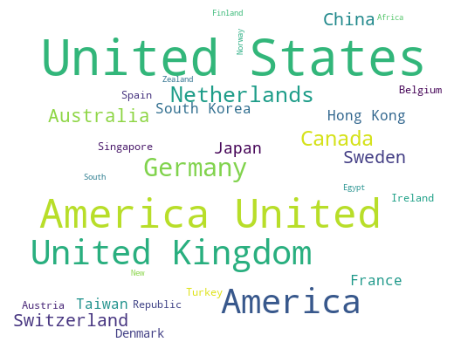

In [14]:
x2011= timesData.country[timesData.year==2011]
plt.subplots(figsize=(8,8))
wordcloud= WordCloud(
    background_color='white',
    width=512,
    height=384).generate(" ".join(x2011))  # generate, datada en çok kullanılan country'leri ayır ve büyük bir şekilde yazdır anlamına geliyor.
plt.imshow(wordcloud)   # image show 
plt.axis('off')
plt.savefig('graph.png')

plt.show()

## Box Plot

In [15]:
x2015=timesData[timesData.year==2015]

trace0= go.Box(
    y= x2015.total_score,
    name= 'total score of universities in 2015',
    marker= dict(
        color='rgb(12,12,140)',))

trace1=go.Box(
    y= x2015.research,
    name= 'research of universities in 2015',
    marker= dict(
        color='rgb(12,128,128)',))

data=[trace0, trace1]
iplot(data)

eğer birden fazla column alınıp karşılaştırma yapılmak isteniyorsa df'yi alırken bütün df'yi alıyoruz ve daha sonra trace'ler içerisinde karşılatırmak istediğimiz column'ları y ekseninde alacağız.

## Scatter Matrix Plots

In [16]:
import plotly.figure_factory as ff  #plotly'ın figure_factory package'ından yararlanıyoruz

dataframe = timesData[timesData.year==2015]
data2015= dataframe.loc[:,["research", "international", "total_score"]]
data2015["index"]= np.arange(1, len(data2015)+1)
fig=ff.create_scatterplotmatrix(data2015, diag='box', index='index', colormap='Portland', colormap_type='cat', height=700, width=700)
iplot(fig)

# bu package creat_scatterplotmatrix metodunu içeriyor.
# diag = diagonal  - boxplot olsun
# index'i data index'ine eşitliyoruz
# portland map'i sağda görünen lacivertten kırmızıya olan map
# colormap_type cat


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



## Inset Plot

In [17]:
# the first line plot
trace1=go.Scatter(
x= dataframe.world_rank,
y= dataframe.teaching,
name="teaching",
marker= dict(color='rgba(16, 112,2,0.8)'),
)

# second line plot

trace2 = go.Scatter(
x= dataframe.world_rank,
y= dataframe.income,
xaxis='x2',
yaxis='y2',
name= "income",
marker= dict(color='rgba(160, 112,20,0.8)'),
)

data=[trace1, trace2]
layout= go.Layout(
    xaxis2=dict(
    domain=[0.6, 0.95],
    anchor='y2',),
    
    yaxis2=dict(
    domain=[0.6, 0.95],
    anchor= 'x2',),
    
    title= 'Income and Teaching vs World Rank of Universities'
)

fig= go.Figure(data=data, layout=layout)
iplot(fig)

## 3D Scatter Plot with Colorscaling

In [18]:
trace1= go.Scatter3d(
    x= dataframe.world_rank,
    y= dataframe.research,
    z= dataframe.citations,
    mode='markers',
    marker= dict(
        size=10,
        color='rgb(255,0,0)',))

data= [trace1]
layout= go.Layout(
    margin= dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig= go.Figure(data=data, layout=layout)
iplot(fig)

## Multiple Subplots

In [19]:
trace1= go.Scatter(x= dataframe.world_rank, y=dataframe.research, name= "research")
trace2= go.Scatter(x= dataframe.world_rank, y=dataframe.citations, xaxis='x2', yaxis='y2', name="citations")
trace3= go.Scatter(x= dataframe.world_rank, y= dataframe.income, xaxis='x3', yaxis='y3', name="income")
trace4= go.Scatter(x=dataframe.world_rank, y= dataframe.total_score, xaxis='x4', yaxis='y4', name="total_score")
data=[trace1, trace2, trace3, trace4]
layout= go.Layout( xaxis=dict(domain=[0, 0.45]), xaxis2= dict(domain=[0.55, 1]), xaxis3= dict(domain=[0, 0.45], anchor='y3'), xaxis4=dict(domain=[0.55, 1], anchor='y4'), yaxis= dict(domain=[0, 0.45]), yaxis2= dict(domain=[0, 0.45], anchor='x2'), yaxis3= dict(domain=[0.55, 1]), yaxis4= dict(domain=[0.55, 1], anchor='x4'),
                 title= 'Research, citation, income and total score VS World Rank of Universities')
fig= go.Figure(data=data, layout=layout)
iplot(fig)